In [2]:
import pandas as pd
import seaborn as sns 

# Notebook for testing different Sentiment classification models

In [6]:
### TEST DATA LOAD

politics = pd.read_csv('../../data/date_folders/feb_28/scrapes/politics.csv')
antiwork = pd.read_csv('../../data/date_folders/april_17/scrapes/antiwork.csv')

datasets = [politics, antiwork]


## Using Textblob

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
# import it
from textblob import TextBlob

#call the classifier
def sentiment_texblob(row):
  
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity
    # subjectivity = classifier.sentiment.subjectivity
    
    return polarity

In [8]:
sentiment_texblob('I love balls')

0.5

In [12]:
for dataframe in datasets:
    sentiments = []
    for comment in dataframe['comment_text']:
        sentiment = sentiment_texblob(comment)
        sentiments.append(sentiment)
    dataframe['comment_sentiment'] = sentiments

<AxesSubplot:xlabel='comment_sentiment', ylabel='Count'>

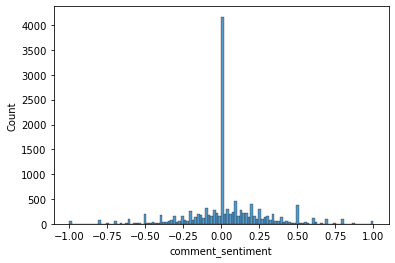

In [13]:
sns.histplot(data=politics, x='comment_sentiment')

<AxesSubplot:xlabel='comment_sentiment', ylabel='Count'>

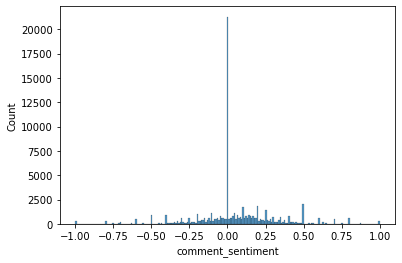

In [14]:
sns.histplot(data=antiwork, x='comment_sentiment')


## Using Vader

In [21]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [15]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    compound = sentiment_dict['compound']
    
    return compound

In [16]:
for dataframe in datasets:
    sentiments = []
    for comment in dataframe['comment_text']:
        sentiment = sentiment_vader(comment)
        sentiments.append(sentiment)
    dataframe['comment_sentiment'] = sentiments

<AxesSubplot:xlabel='comment_sentiment', ylabel='Count'>

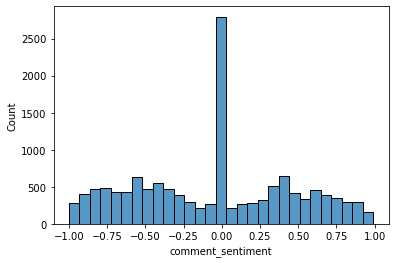

In [24]:
sns.histplot(data=politics, x='comment_sentiment')

<AxesSubplot:xlabel='comment_sentiment', ylabel='Count'>

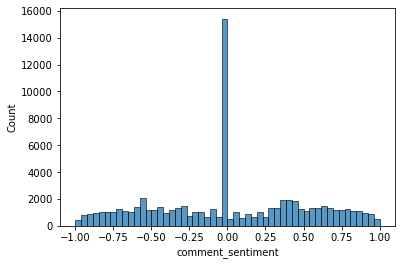

In [17]:
sns.histplot(data=antiwork, x='comment_sentiment')

## Happy transformer

In [25]:
pip install happytransformer

  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.3
    Uninstalling fsspec-0.8.3:
      Successfully uninstalled fsspec-0.8.3
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

datasets 2.11.0 requires tqdm>=4.62.1, but you'll have tqdm 4.50.2 which is incompatible.


In [34]:
from happytransformer import HappyTextClassification
happy_tc = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

sentiments = []
for comment in politics['comment_text']:
    comment = comment[:512]
    sentiment = happy_tc.classify_text(comment)
    if sentiment.label == 'NEGATIVE':
        sentiment = -abs(sentiment.score)
    else:
        sentiment = sentiment.score
    sentiments.append(sentiment)
politics['comment_sentiment'] = sentiments

04/25/2023 16:44:51 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [35]:
happy_tc.classify_text('I love balls')

TextClassificationResult(label='POSITIVE', score=0.9998340606689453)

<AxesSubplot:xlabel='comment_sentiment', ylabel='Count'>

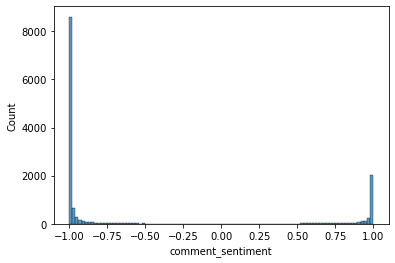

In [36]:
sns.histplot(data=politics, x='comment_sentiment')

In [18]:
import random

In [24]:
for i in range(10):
    sen = random.choice(politics['comment_text'])
    print(f'comment: {sen}\nScore: {sentiment_texblob(sen)}\n')

comment: So basically he's just an actor playing a roll he's getting paid for... Hmmm.
Score: 0.0

comment: I agree. Let’s stop subsidizing the red states and let them fend for themselves.
Score: 0.0

comment: Water is wet
Score: -0.1

comment: One crook was held accountable.  One of those super majority juries will hold the other accountable at some point.
Score: 0.10416666666666666

comment: Oh no not fines
Score: 0.0

comment: I strongly suspect this is something the Pentagon declined to include in the Presidential briefings….
Score: 0.4333333333333333

comment: Nothing would help democrats more than violence caused by trump supporters.
Score: 0.5

comment: Those are actually not mutually exclusive
Score: 0.0

comment: And you think *we* have conspiracy theories?!
Score: 0.0

comment: Republicans always lie.
Score: 0.0

